
<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> TITANIC SURVIVAL PREDICTION
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the necessary Library:

In [74]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

plt.style.use("fivethirtyeight")

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error 

In [75]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

**Import the datasets**

In [76]:
titanic_data=pd.read_csv("tested.csv")

In [77]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,NaN,S


In [78]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.900000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.358300,NaN,C


In [79]:
titanic_data.shape

(418, 12)

In [80]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


- There are total 418 rows and 12 columns in the dataset.
- In 12 columns there are 7 numerical columns and 5 categorical columns in the dataset 
- The total memory usage is arroud 39.3+KB.


In [81]:
titanic_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.000000,NaN,NaN,NaN,1100.500000,120.810458,892.000000,996.250000,1100.500000,1204.750000,1309.000000
Survived,418.000000,NaN,NaN,NaN,0.363636,0.481622,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,418.000000,NaN,NaN,NaN,2.265550,0.841838,1.000000,1.000000,3.000000,3.000000,3.000000
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.000000,NaN,NaN,NaN,30.272590,14.181209,0.170000,21.000000,27.000000,39.000000,76.000000
SibSp,418.000000,NaN,NaN,NaN,0.447368,0.896760,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,418.000000,NaN,NaN,NaN,0.392344,0.981429,0.000000,0.000000,0.000000,0.000000,9.000000
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.000000,NaN,NaN,NaN,35.627188,55.907576,0.000000,7.895800,14.454200,31.500000,512.329200


### Null-Value Treatement:

In [82]:
titanic_data.isnull().sum()/len(titanic_data)*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age           20.574163
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.239234
Cabin         78.229665
Embarked       0.000000
dtype: float64

- The Cabin has 78% of missing value.
- Hence it is ideal to drop the whole column.
- For the Fare column which has 0.23% of null, we cal remove the rows that contains the null value.


In [83]:
titanic_data=titanic_data.drop(columns="Cabin")

In [84]:
titanic_data.isnull().sum()/len(titanic_data)

PassengerId   0.000000
Survived      0.000000
Pclass        0.000000
Name          0.000000
Sex           0.000000
Age           0.205742
SibSp         0.000000
Parch         0.000000
Ticket        0.000000
Fare          0.002392
Embarked      0.000000
dtype: float64

In [85]:
titanic_data=titanic_data[~titanic_data.Fare.isnull()]

In [86]:
titanic_data.isnull().sum()/len(titanic_data)

PassengerId   0.000000
Survived      0.000000
Pclass        0.000000
Name          0.000000
Sex           0.000000
Age           0.206235
SibSp         0.000000
Parch         0.000000
Ticket        0.000000
Fare          0.000000
Embarked      0.000000
dtype: float64

**Age: For this column we will impute the null values with  mean or median**

<AxesSubplot:xlabel='Age', ylabel='Count'>

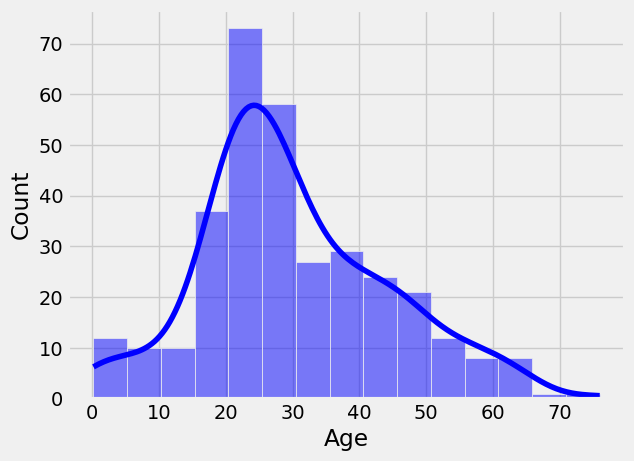

In [87]:
sns.histplot(data=titanic_data, x="Age", kde=True, color="Blue")


- The age column  is slightly normally distributed.
- hence we can fill the null values with mean

In [88]:
round(titanic_data.Age.mean())

30

In [89]:
titanic_data.Age.median()

27.0

In [90]:
titanic_data.Age.fillna(round(titanic_data.Age.mean()), inplace=True)

In [91]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [92]:
titanic_data.shape

(417, 11)

- After removing the null value the shape of the dataset is 417 rows and 11 columns.

**Duplicate Value Treatment**

In [93]:
titanic_data.duplicated().sum()

0

- The dataset does not have duplicated value.

**EDA : Exploratory Data Analysis**

In [94]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**PassengerId**

In [95]:
titanic_data.PassengerId.nunique()

417

- The column is the unique identifier.
- We don't need this column in the dataset for model building.


In [96]:
Passanger_ID=titanic_data["PassengerId"]

In [97]:
titanic_data.drop(columns="PassengerId", inplace=True)

**Survived**
- Here 1 stands for survived and 0 stands for "Not Survived"

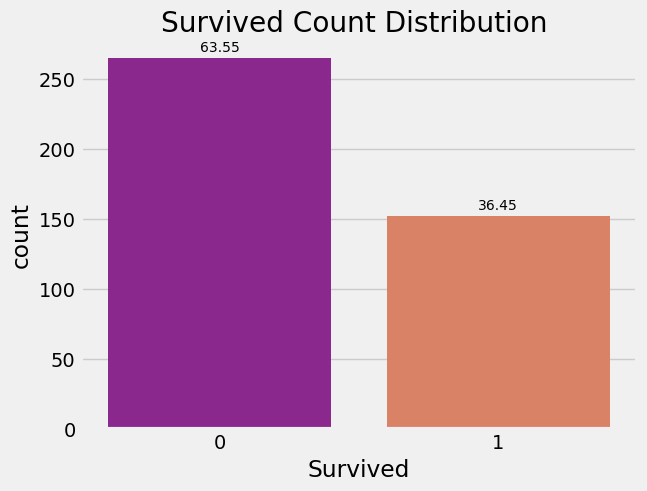

In [98]:
ax=sns.countplot(titanic_data["Survived"], palette="plasma")
plt.title('Survived Count Distribution ')
for bar in ax.patches:
        ax.annotate(format(bar.get_height()/len(titanic_data)*100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- Arround 63.55% of people didn't survived.
- Only 36.45% people Survived.

**Sex**

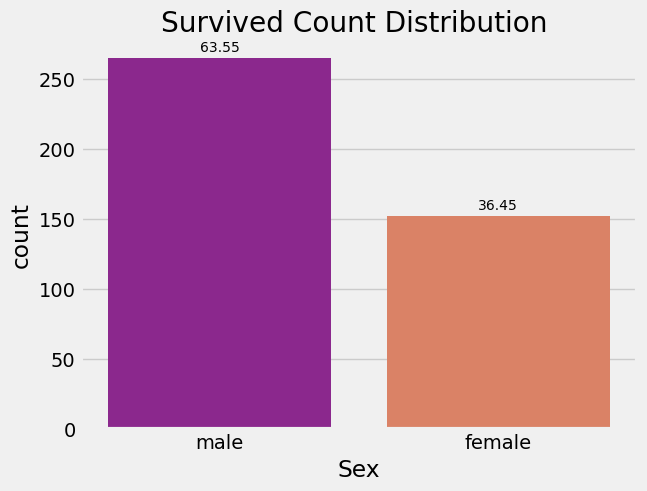

In [99]:
ax=sns.countplot(x='Sex',data=titanic_data, palette="plasma")
plt.title('Survived Count Distribution ')
for bar in ax.patches:
        ax.annotate(format(bar.get_height()/len(titanic_data)*100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- There were more Males in the ship.

**Pclass : Passanger Class**

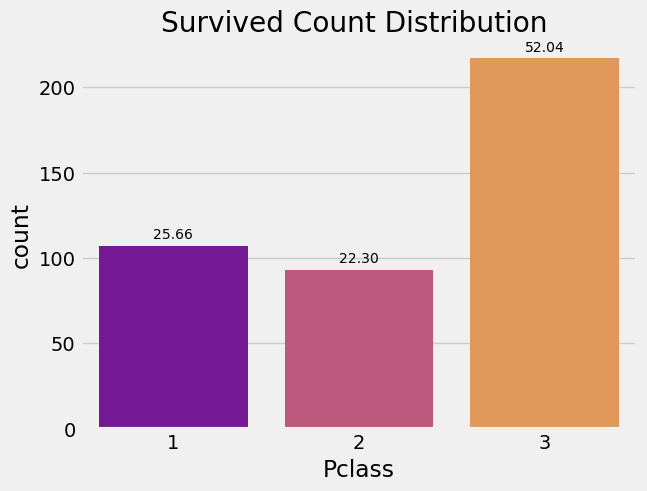

In [100]:
ax=sns.countplot(x='Pclass',data=titanic_data, palette="plasma")
plt.title('Survived Count Distribution ')
for bar in ax.patches:
        ax.annotate(format(bar.get_height()/len(titanic_data)*100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- There more passangers from the 3rd Class.


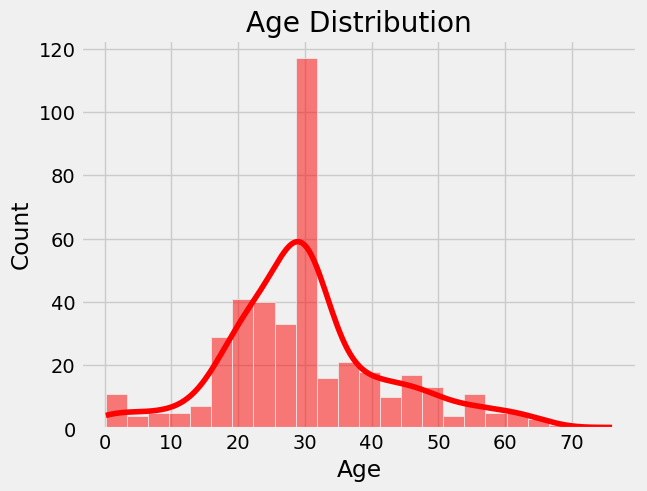

In [101]:
sns.histplot(titanic_data['Age'], color="red", kde=True)
plt.title('Age Distribution')
plt.show()


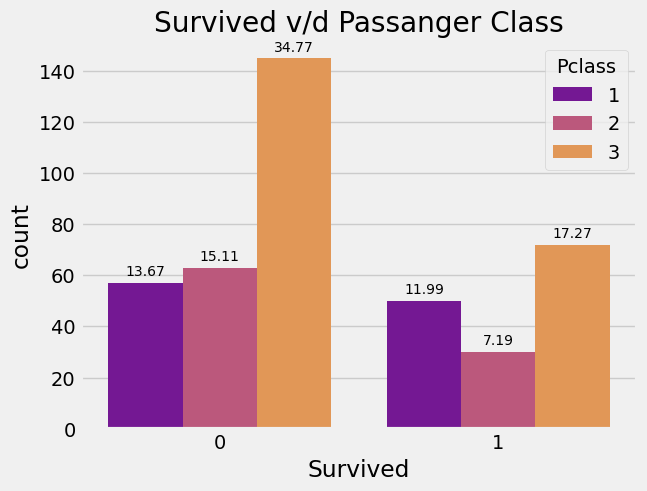

In [102]:
ax=sns.countplot(titanic_data["Survived"], hue=titanic_data["Pclass"], palette="plasma")
plt.title('Survived v/d Passanger Class')
for bar in ax.patches:
        ax.annotate(format(bar.get_height()/len(titanic_data)*100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- The passangers from Class 3 didn't survived  the death troll was arroud 34.77%.
- While survival rate of Class 1 passanger was more i.e 12%.

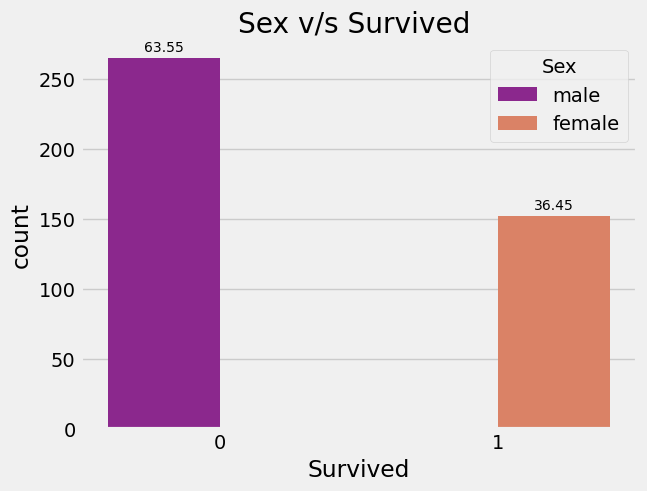

In [103]:
ax=sns.countplot(titanic_data["Survived"], hue=titanic_data["Sex"], palette="plasma")
plt.title('Sex v/s Survived ')
for bar in ax.patches:
        ax.annotate(format(bar.get_height()/len(titanic_data)*100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- Not a single male survived in incident.
- While most of the female survived.

In [104]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,Q
3,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,S


**Name**

In [105]:
titanic_data.Name.nunique()

417

- The Name columns is also unique hence this column is also not useful for our model

In [106]:
titanic_data=titanic_data.drop(columns="Name")

**Embarked :These indicates the port where passengers got on board the Titanic**
- C : Cherbourg: A city in northern France.
- Q : Queenstown (now known as Cobh): A town in County Cork, Ireland.
- S : Southampton: A city on the south coast of England.

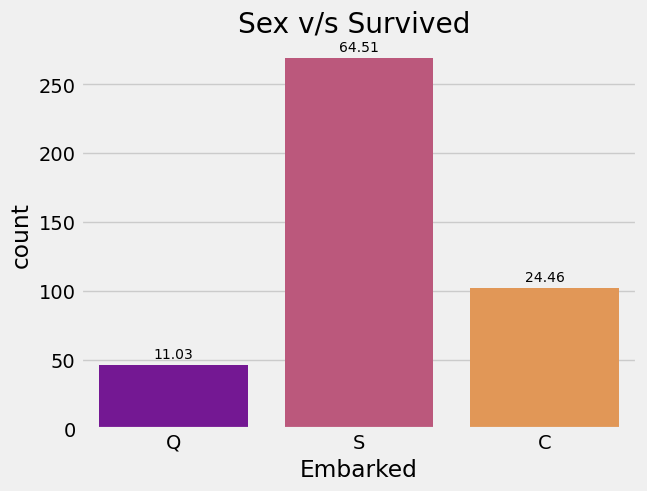

In [107]:
ax=sns.countplot(titanic_data["Embarked"] ,palette="plasma")
plt.title('Sex v/s Survived ')
for bar in ax.patches:
        ax.annotate(format(bar.get_height()/len(titanic_data)*100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- Maximum number od passangers borded from Southampton.

**SibSp : Number of siblings**

In [108]:
titanic_data.SibSp.value_counts()

0    282
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

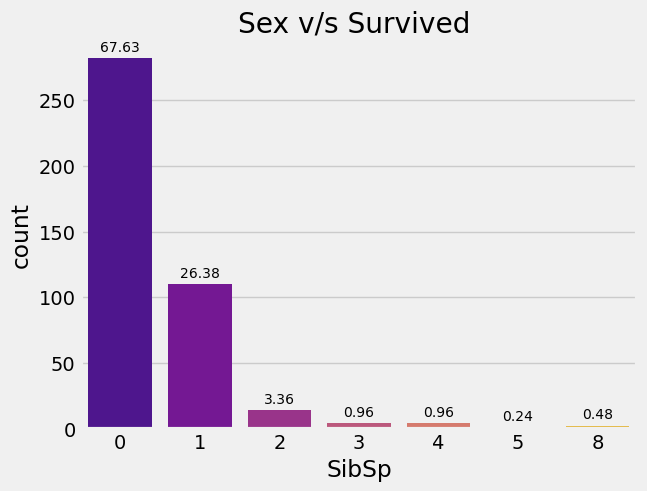

In [109]:
ax=sns.countplot(titanic_data["SibSp"] ,palette="plasma")
plt.title('Sex v/s Survived ')
for bar in ax.patches:
        ax.annotate(format(bar.get_height()/len(titanic_data)*100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [110]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.500000,0,0,330911,7.829200,Q
1,1,3,female,47.000000,1,0,363272,7.000000,S
2,0,2,male,62.000000,0,0,240276,9.687500,Q
3,0,3,male,27.000000,0,0,315154,8.662500,S
4,1,3,female,22.000000,1,1,3101298,12.287500,S


**Parch : Number of parents/children aboard**

In [111]:
titanic_data.Parch.value_counts()

0    323
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

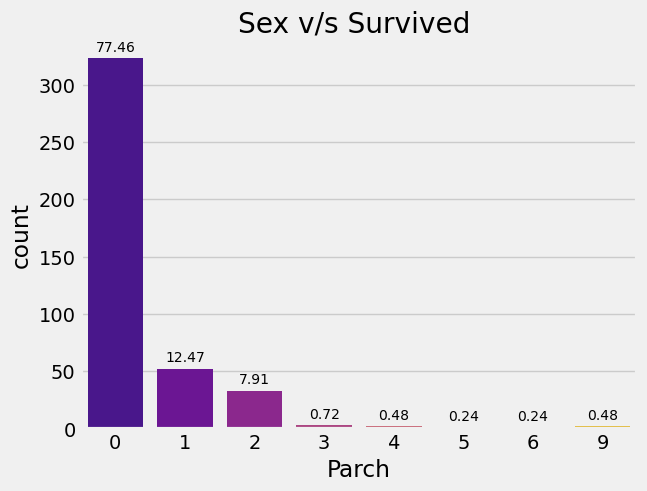

In [112]:
ax=sns.countplot(titanic_data["Parch"] ,palette="plasma")
plt.title('Sex v/s Survived ')
for bar in ax.patches:
        ax.annotate(format(bar.get_height()/len(titanic_data)*100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- The passanges without children were more in the ship.

 **Fare: Basic fare for passanger**

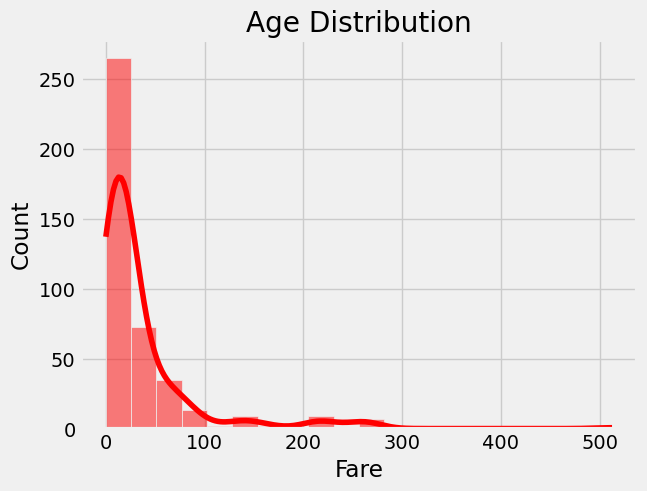

In [113]:
sns.histplot(titanic_data['Fare'], color="red", kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

In [114]:
titanic_data.Pclass.value_counts()

3    217
1    107
2     93
Name: Pclass, dtype: int64

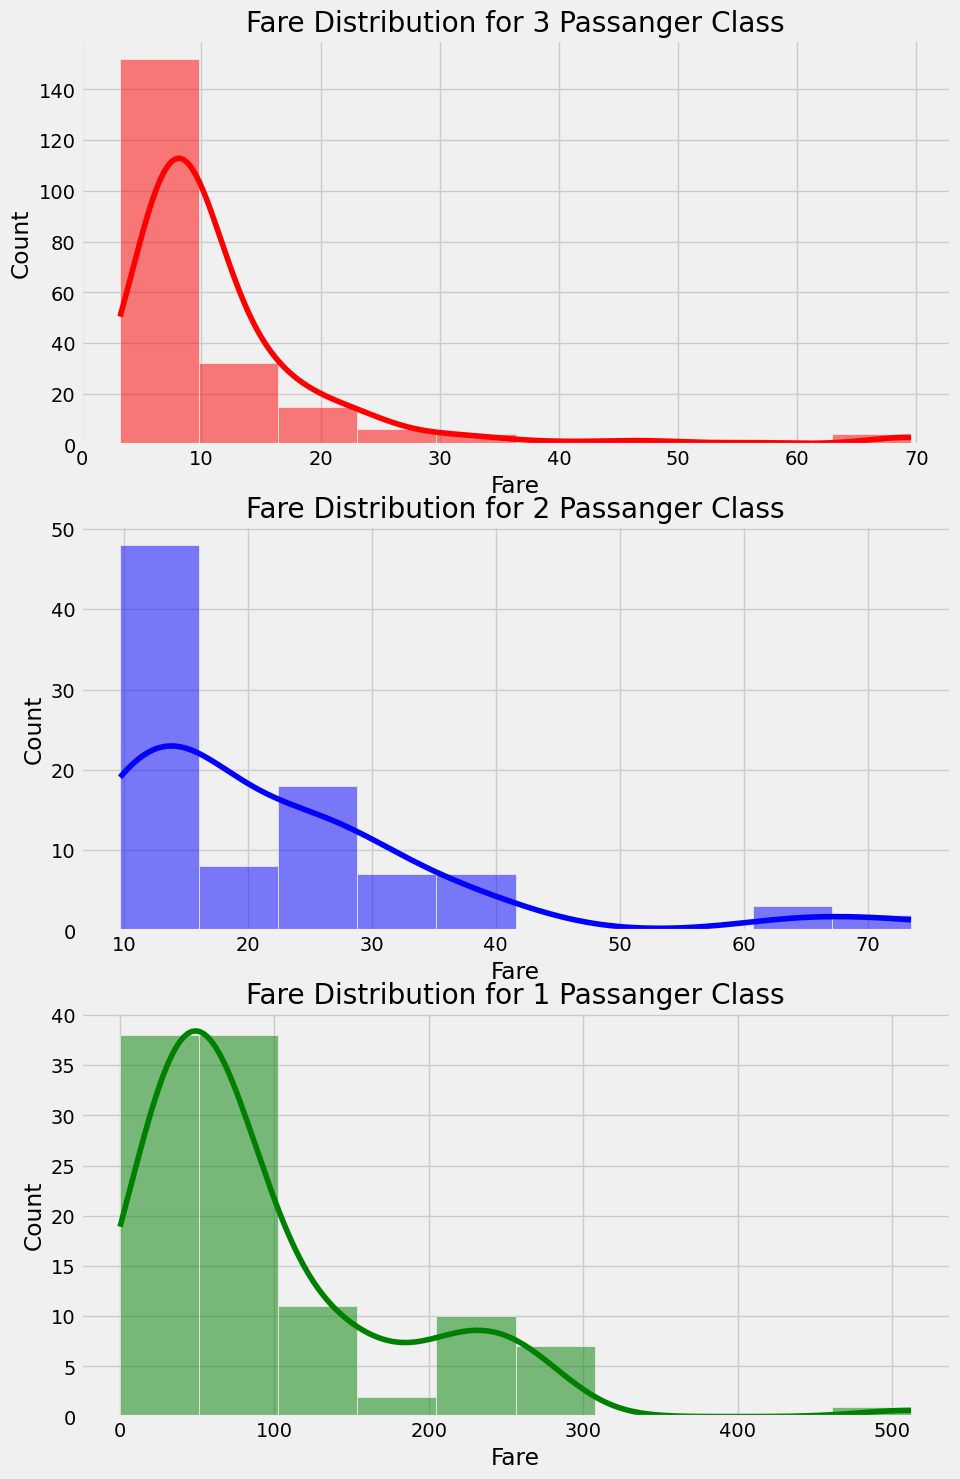

In [115]:
plt.figure(figsize=(10,17))
color=["red", "blue", "green"]
count=0
for i,j in zip(titanic_data.Pclass.unique(),color):
    plt.subplot(3,1,count+1)
    data=titanic_data[titanic_data.Pclass==i]
    sns.histplot(data["Fare"], bins=10, color=j, kde=True)
    plt.title(f"Fare Distribution for {i} Passanger Class")
    count=count+1

In [116]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.500000,0,0,330911,7.829200,Q
1,1,3,female,47.000000,1,0,363272,7.000000,S
2,0,2,male,62.000000,0,0,240276,9.687500,Q
3,0,3,male,27.000000,0,0,315154,8.662500,S
4,1,3,female,22.000000,1,1,3101298,12.287500,S


**Ticket : Ticket Number**

In [117]:
titanic_data.Ticket.nunique()

362

- we will drop this column.

In [118]:
titanic_data.drop(columns="Ticket", inplace=True)

### Model Building:

In [119]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.500000,0,0,7.829200,Q
1,1,3,female,47.000000,1,0,7.000000,S
2,0,2,male,62.000000,0,0,9.687500,Q
3,0,3,male,27.000000,0,0,8.662500,S
4,1,3,female,22.000000,1,1,12.287500,S


In [120]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    object 
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


**Dummy Encoding**

In [121]:
cat_cols=["Sex","Embarked"]


In [122]:
final_data=pd.get_dummies(titanic_data, columns=cat_cols)

In [123]:
final_data.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

**Scaling**

In [124]:
std_scale=StandardScaler()

final_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]=std_scale.fit_transform(final_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])



In [125]:
final_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.875330,0.347171,-0.500218,-0.400804,-0.497811,0,1,0,1,0
1,1,0.875330,1.343387,0.615242,-0.400804,-0.512660,1,0,0,0,1
2,0,-0.313636,2.538847,-0.500218,-0.400804,-0.464532,0,1,0,1,0
3,0,0.875330,-0.250559,-0.500218,-0.400804,-0.482888,0,1,0,0,1
4,1,0.875330,-0.649046,0.615242,0.618314,-0.417971,1,0,0,0,1


<AxesSubplot:>

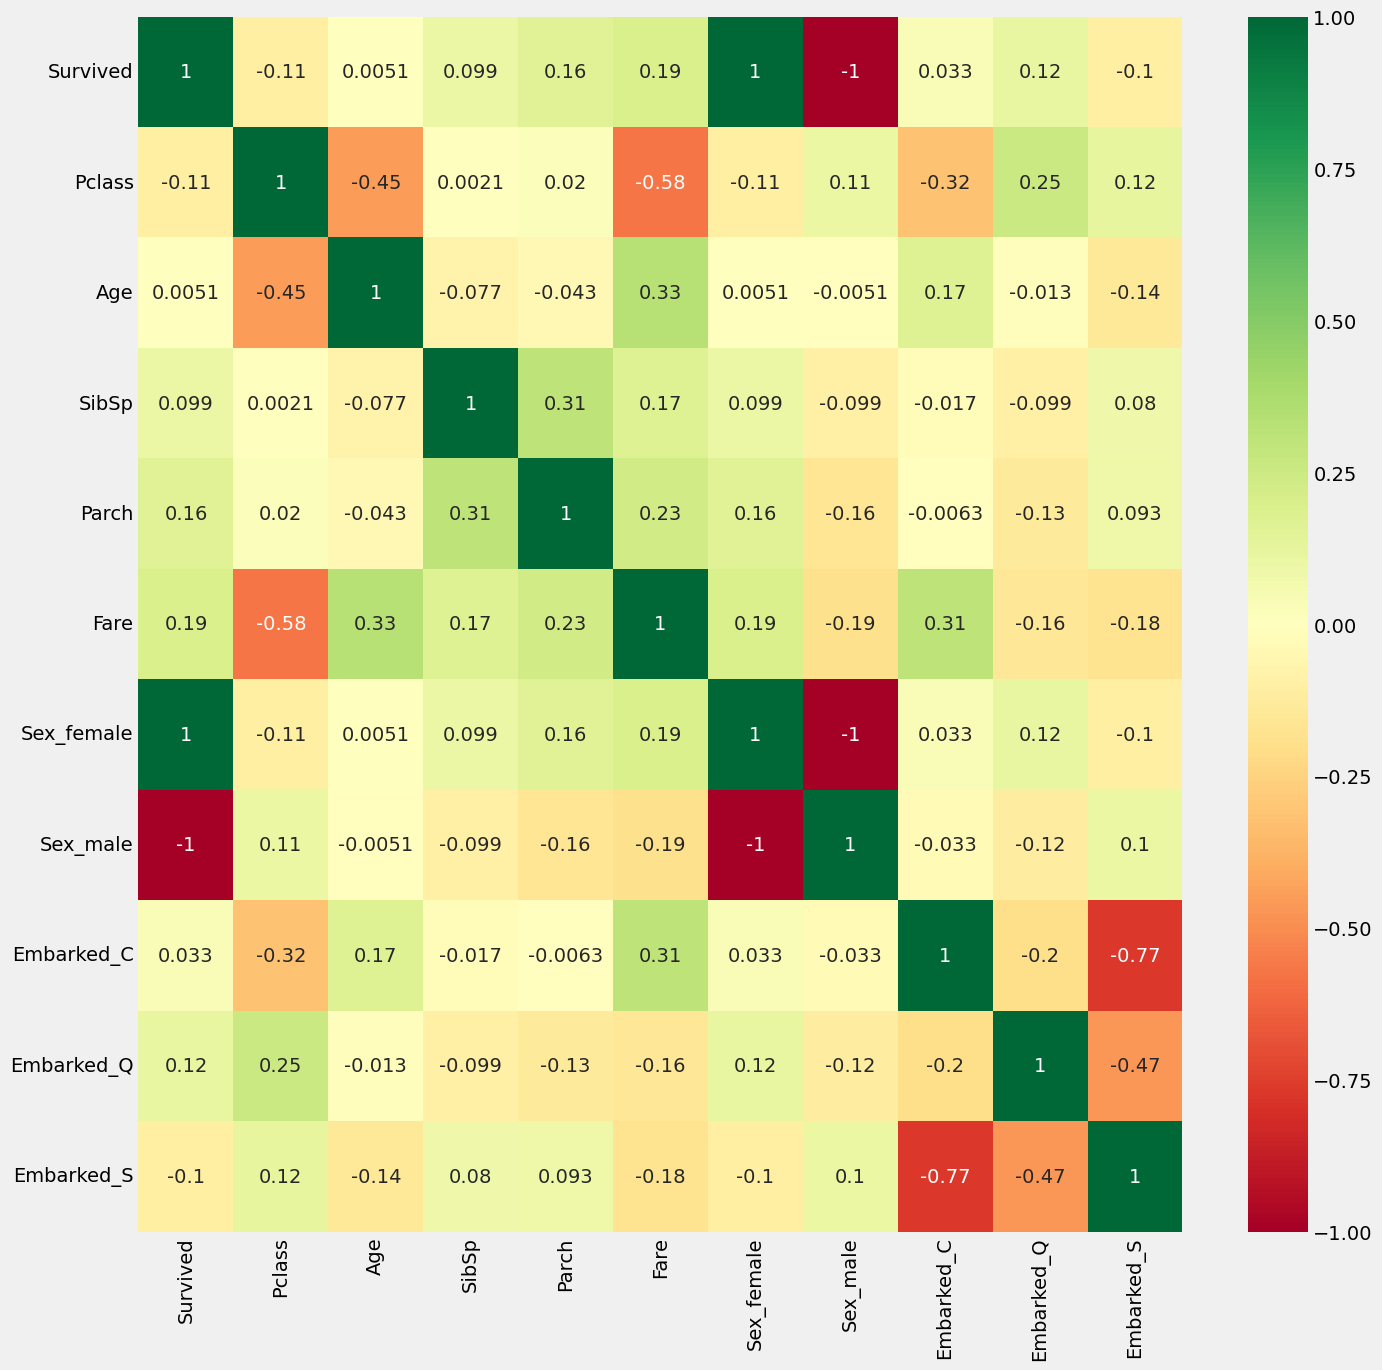

In [126]:
## Checking for collinearity:
plt.figure(figsize=(15,15))
sns.heatmap(final_data.corr(), cmap="RdYlGn", annot=True)

**Train-Test Split**

In [127]:
# Sperate independent and dependent variables:
y=final_data["Survived"]
X=final_data.drop(columns="Survived")

In [128]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [129]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.875330,0.347171,-0.500218,-0.400804,-0.497811,0,1,0,1,0
1,0.875330,1.343387,0.615242,-0.400804,-0.512660,1,0,0,0,1
2,-0.313636,2.538847,-0.500218,-0.400804,-0.464532,0,1,0,1,0
3,0.875330,-0.250559,-0.500218,-0.400804,-0.482888,0,1,0,0,1
4,0.875330,-0.649046,0.615242,0.618314,-0.417971,1,0,0,0,1


In [130]:
#Train-Test Split : 

In [131]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=100)

In [132]:
X_train.shape

(291, 10)

In [133]:
X_test.shape

(126, 10)

In [134]:
y_test.shape

(126,)

In [135]:
y_train.shape

(291,)

## Model Building:

In [136]:
final_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.875330,0.347171,-0.500218,-0.400804,-0.497811,0,1,0,1,0
1,1,0.875330,1.343387,0.615242,-0.400804,-0.512660,1,0,0,0,1
2,0,-0.313636,2.538847,-0.500218,-0.400804,-0.464532,0,1,0,1,0
3,0,0.875330,-0.250559,-0.500218,-0.400804,-0.482888,0,1,0,0,1
4,1,0.875330,-0.649046,0.615242,0.618314,-0.417971,1,0,0,0,1


In [137]:
model_log=LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [138]:
predicted_value=model_log.predict(X_train)
predicted_value

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1], dtype=int64)

In [141]:
Evaluation_df=pd.DataFrame({ "Actual":y_train, "Predicted":predicted_value})

In [142]:
Evaluation_df

,Actual,Predicted
150,1,1
80,0,0
346,0,0
270,0,0
272,1,1
243,0,0
47,0,0
273,1,1
417,0,0
59,1,1


In [143]:
# Confusion matrix:
confusion=confusion_matrix(Evaluation_df.Actual, Evaluation_df.Predicted)
confusion

array([[184,   0],
       [  0, 107]], dtype=int64)

In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(f"TP : {TP} ,  TN : {TN},  FP : {FP} , FN : {FN}" )

TP : 107 ,  TN : 184,  FP : 0 , FN : 0


In [148]:
# Accuracy:
accuracy=accuracy_score(Evaluation_df.Actual, Evaluation_df.Predicted)
accuracy

1.0

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

1.0

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

1.0

In [151]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0


In [152]:
# positive predictive value 
print (TP / float(TP+FP))

1.0


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

1.0


- The Accuracy of our model was found to be 100% 

In [154]:
# Prediction on Test data:

In [156]:
predicted_test=model_log.predict(X_test)
predicted_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [158]:
#Accuracy for Test Data:
Test_accuracy=accuracy_score(y_test, predicted_test)
Test_accuracy

1.0

- both the test and train accuracy is 100%